#**CardioNex - Pioneering Early Detection and Prevention of Heart Disease with AI**


---

#**BLUF**

*  (1) Firstly, we deal with NaNs and duplicates.
**    For NaNs, we divide into numerical and categorical values; We drop NaN in HeartDisease (3 NaN), then for the rest of the NaN in numeric values, use KNN to fill; After using KNN, use min-max scaling to scale the data. Then use mode to fill categorical NaNs.
**    For duplicates, drop the dups
*   (2) Next we deal with the imbalance problem, use SMOTE and get the balanced data for HeartDisease.
*   (3) Then use PCA model. Without the PCA, we have accuracy of 0.8254; With PCA (components = 5), the accuracy decreased to 0.7566. We computed confusion matrix under both circumstances.
*   (4) Last, we used a 5-fold cross-validation to compute the average accuracy of mean 0.7505 and std of 0.0135.

#**Business Problem**

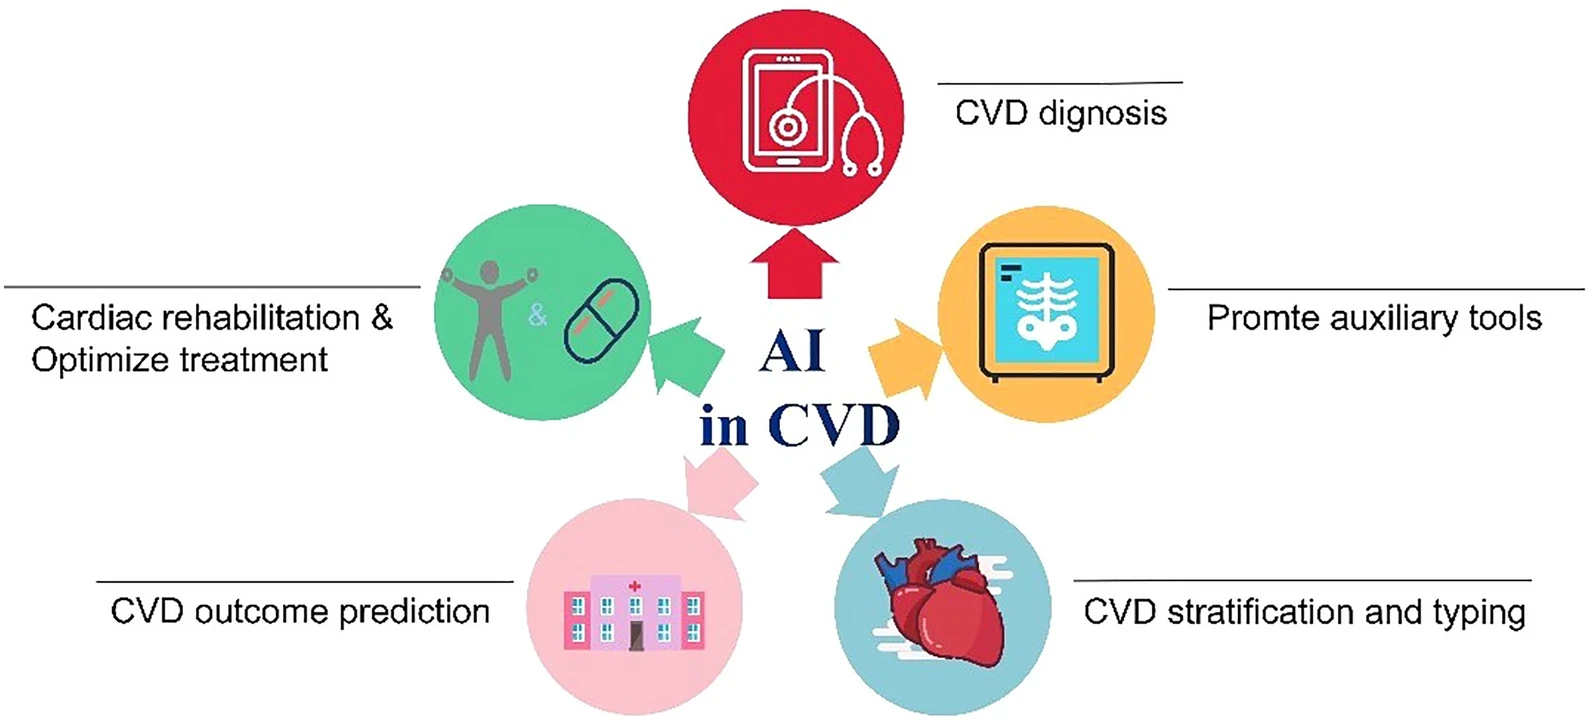


Source : [Sun, X., Yin, Y., Yang, Q. et al. Artificial intelligence in cardiovascular diseases: diagnostic and therapeutic perspectives. Eur J Med Res 28, 242 (2023)](https://doi.org/10.1186/s40001-023-01065-y).


Cardiovascular diseases (CVDs) represent the leading cause of mortality globally, claiming approximately 17.9 million lives annually and accounting for 31% of all deaths worldwide [[1](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)]. Notably, 80% of CVD deaths are attributed to heart attacks and strokes, with a significant portion occurring prematurely in individuals under the age of 70 [[2](https://www.ahajournals.org/doi/10.1161/CIR.0000000000000950)]. The economic impact is equally staggering, with the global cost of CVD expected to reach USD 1,044 billion by 2030 [[3](https://www.bloomberg.com/news/articles/2011-01-24/heart-disease-treatment-cost-to-triple-to-818-billion-by-2030-group-says)]. In this context, CardioNex introduces an AI-driven solution aimed at transforming the early detection and management of heart disease, potentially saving lives and reducing healthcare costs.


##**The Challenge**
The prevalence of CVD and its associated strains on healthcare systems and economies necessitates innovative approaches for early detection and intervention. Current methodologies for managing heart disease risk factors, such as hypertension, diabetes, and hyperlipidemia, rely heavily on traditional diagnostics and patient self-reporting, which may not effectively identify at-risk individuals before adverse events occur.

##**Vision**
CardioNex aims to leverage a dataset containing 11 predictive features for heart disease, employing advanced machine learning algorithms to develop a predictive model that can accurately identify individuals at high risk of cardiovascular diseases. This initiative not only seeks to enhance patient outcomes but also to provide healthcare providers and insurers with a tool to mitigate risks, manage healthcare costs, and improve overall health system efficiency.

##**Business Objectives**
Develop an AI-Enabled Predictive Model: Utilize machine learning to analyze cardiovascular risk factors, creating a model that predicts the likelihood of heart disease with high accuracy.

* <u> Reduce Healthcare Costs</u>: Early detection and preventive measures can significantly decrease the need for expensive treatments and interventions, potentially saving billions in healthcare expenditures annually.

* <u> Enhance Patient Outcomes</u>: By identifying at-risk individuals early, CardioNex enables proactive management of heart health, improving quality of life and reducing mortality rates.

* <u> Inform Health Policy and Insurance Practices</u>: Provide policymakers and insurance companies with data-driven insights to refine health insurance models, promote preventive care, and allocate resources more effectively.


##**Data**
1.   Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

##**Libraries**

In [1]:
!pip install -q pycaret autoviz --upgrade psynlig
from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s

In [2]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.808. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [3]:
# Basic libraries
import pandas as pd
from psynlig import pca_explained_variance_bar
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
import math
from matplotlib.colors import ListedColormap

In [4]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [5]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

##**Data**

In [97]:
# Read
# File: https://drive.google.com/file/d/1LGCaHL6MKf0vgQIQZ34xA2uUnInlSMNe/view?usp=share_link
url = 'https://drive.google.com/uc?export=download&id=1STcDIFKGImfW2-C3P-8Kwu9YD9HqYfF_'

# Read in the dataset
df = pd.read_csv(url, index_col = 0)

In [98]:
# Show dataframe
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160,180.0,0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130,283.0,0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138,214.0,0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150,195.0,0,Normal,NaN,N,0.0,Up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
943,60,M,ASY,130,186.0,1,LVH,NaN,Y,0.5,Flat,1.0
944,42,F,NAP,115,211.0,0,ST,137.0,N,0.0,NaN,0.0
945,38,M,ASY,110,289.0,0,Normal,NaN,Y,1.5,NaN,1.0
946,45,M,ASY,142,309.0,0,LVH,147.0,Y,0.0,Flat,1.0


In [99]:
# Shape
df.shape

(948, 12)

# M2 Hackathon starts here!

# Deal with NaN and duplicates

In [104]:
# Check missing values
print('Number of missing Values by Feature\n',df.isnull().sum())
columns_with_NaNs = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)

Number of missing Values by Feature
 Age                 0
Sex                 0
ChestPainType     136
RestingBP           0
Cholesterol         3
FastingBS           0
RestingECG          0
MaxHR               3
ExerciseAngina      0
Oldpeak             0
ST_Slope           61
HeartDisease        0
dtype: int64
Columns with NaNs: ['ChestPainType', 'Cholesterol', 'MaxHR', 'ST_Slope']


In [114]:
# drop NaN in heartdisease
df = df.dropna(subset=['HeartDisease'])

In [105]:
from sklearn.impute import KNNImputer
import pandas as pd

# 1. KNN Imputation for Numerical Columns
numerical_cols = ['Cholesterol', 'MaxHR']
imputer = KNNImputer(n_neighbors=5)
df_numerical = df[numerical_cols]
df_numerical_imputed = imputer.fit_transform(df_numerical)
df[numerical_cols] = pd.DataFrame(df_numerical_imputed, columns=numerical_cols)


In [115]:
# check missing value in df again (should have no missing value in 'Cholesterol', 'MaxHR')
print('Number of missing Values by Feature\n',df.isnull().sum())
columns_with_NaNs = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)

Number of missing Values by Feature
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Columns with NaNs: []


In [116]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Selecting numerical columns (excluding dummy encoded columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Scale the numerical columns
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Displaying the first few rows of the scaled DataFrame
print(df_scaled.head())

      Age   Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  0.244898   M       ATA        0.70      0.479270       0.0      Normal     
1  0.428571   F       NAP        0.80      0.298507       0.0      Normal     
2  0.183673   M       ATA        0.65      0.469320       0.0          ST     
3  0.408163   F       ASY        0.69      0.354892       0.0      Normal     
4  0.530612   M       NAP        0.75      0.323383       0.0      Normal     

     MaxHR  ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  0.788732        N        0.295455     Up         0.0      
1  0.676056        N        0.409091   Flat         1.0      
2  0.267606        N        0.295455     Up         0.0      
3  0.338028        Y        0.465909   Flat         1.0      
4  0.571831        N        0.295455     Up         0.0      


In [117]:
# Check missing values in df_scaled
print('Number of missing Values by Feature\n',df_scaled.isnull().sum())
columns_with_NaNs = []
for col in df_scaled.columns:
  if df_scaled[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)

Number of missing Values by Feature
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Columns with NaNs: []


In [118]:
# encode categorical variables
# Defining the list of categorical columns for dummy encoding
categorical_cols = ['ChestPainType', 'ST_Slope','Sex', 'RestingECG','ExerciseAngina']

# Performing dummy encoding
df_scaled = pd.get_dummies(df, columns=categorical_cols)

# Displaying the first few rows of the newly encoded DataFrame
print(df_scaled.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0  40      140        289.0         0      172.0    0.0         0.0       
1  49      160        180.0         0      156.0    1.0         1.0       
2  37      130        283.0         0       98.0    0.0         0.0       
3  48      138        214.0         0      108.0    1.5         1.0       
4  54      150        195.0         0      141.2    0.0         0.0       

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0          0                  1                  0                  0          
1          0                  0                  1                  0          
2          0                  1                  0                  0          
3          1                  0                  0                  0          
4          0                  0                  1                  0          

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  Sex_F  Sex_M  RestingE

In [119]:
df_scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289.000000,0,172.00000,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,49,160,180.000000,0,156.00000,1.0,1.0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
2,37,130,283.000000,0,98.00000,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
3,48,138,214.000000,0,108.00000,1.5,1.0,1,0,0,0,0,1,0,1,0,0,1,0,0,1
4,54,150,195.000000,0,141.20000,0.0,0.0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,64,110,309.000000,0,147.00000,1.8,0.0,0,0,0,1,0,1,0,0,1,1,0,0,0,1
941,52,128,261.000000,0,186.00000,0.0,1.0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
942,56,120,204.392433,0,137.87541,0.0,0.0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
943,60,130,204.392433,1,137.87541,0.5,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0,1


In [120]:
# use mode to fill NaN in categorical values
categorical_cols = ['ChestPainType', 'ST_Slope']
for col in categorical_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [121]:
# drop the dups
# Check for duplicates
print('\n Duplicates Before\n',df_scaled.duplicated().sum())

df_scaled = df_scaled.drop_duplicates()

# Check again
print('\n Duplicates After\n',df_scaled.duplicated().sum())


 Duplicates Before
 0

 Duplicates After
 0


In [122]:
df_scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289.000000,0,172.00000,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,49,160,180.000000,0,156.00000,1.0,1.0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
2,37,130,283.000000,0,98.00000,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
3,48,138,214.000000,0,108.00000,1.5,1.0,1,0,0,0,0,1,0,1,0,0,1,0,0,1
4,54,150,195.000000,0,141.20000,0.0,0.0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,64,110,309.000000,0,147.00000,1.8,0.0,0,0,0,1,0,1,0,0,1,1,0,0,0,1
941,52,128,261.000000,0,186.00000,0.0,1.0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
942,56,120,204.392433,0,137.87541,0.0,0.0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
943,60,130,204.392433,1,137.87541,0.5,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0,1


# Next deal with imbalance problem

In [123]:
# check the imbalance in heartdisease
import matplotlib.pyplot as plt

# Check the distribution of 'HeartDisease'
value_counts = df_scaled['HeartDisease'].value_counts()
print("Distribution of HeartDisease column:\n", value_counts)

Distribution of HeartDisease column:
 1.0    521
0.0    421
Name: HeartDisease, dtype: int64


In [124]:
# Next SMOTE the result
%pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Separate the features and the target
X = df_scaled.drop('HeartDisease', axis=1)  # Features
y = df_scaled['HeartDisease']               # Target

# Applying SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Checking the new class distribution
print("New class distribution:\n", pd.Series(y_res).value_counts())

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78c738142c20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1014, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1184, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 113, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so: cannot open shared object file: No such file or directory


New class distribution:
 0.0    521
1.0    521
Name: HeartDisease, dtype: int64


# Model - PCA

## check accuracy without PCA - The accuracy is 0.8254

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model (you can choose another model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is: {accuracy:.4f}')


[[ 53  15]
 [ 18 103]]
The accuracy is: 0.8254


## Next use PCA - The accuracy is 0.7566, which is lower than without PCA

In [133]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Perform PCA with 5 components
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X)

# Add PCA components to the original scaled DataFrame
for i in range(5):
    df_scaled[f'PCA_{i+1}'] = pca_result[:, i]

In [137]:
# Apply PCA
pca = PCA(n_components=5)  # Adjust the number of components
X_pca = pca.fit_transform(X)

# Split the PCA data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = model_pca.predict(X_test_pca)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)
print(conf_matrix)

# Calculate the accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'PCA Model Accuracy: {accuracy_pca:.4f}')

[[49 19]
 [27 94]]
PCA Model Accuracy: 0.7566


## Use a 5-fold cross-validation to compute average accuracy
### The average accuracy is 0.7505

In [138]:
# Initialize the model
model = LogisticRegression()

# Perform 5-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model, X_pca, y, cv=k, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracies for each fold: {scores}')

# Print the mean accuracy and the standard deviation
print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

Accuracies for each fold: [0.76190476 0.72486772 0.7606383  0.75       0.75531915]
Mean Accuracy: 0.7505
Standard Deviation: 0.0135
